In [1]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.channels import make_standard_montage

# 1. File Loading and Preparation
# ----------------------------------------------------------------
# Load CSV data
data = pd.read_csv('20250626170254_MAYANK EEG 1_EEG MAIN STUDY.csv')  # Replace with your filename
sfreq = 500  # Sampling rate (Hz)

# Extract EEG data and convert to volts (nV → V)
eeg_data = data.iloc[:, :32].values.T * 1e-9  # (32 channels x samples)
ch_names = data.columns[:32].tolist()

# Extract events from Marker_Flag column
events = []
for i in range(len(data)):
    marker = data['Marker_Flag'].iloc[i]
    if marker > 0:  # Only consider non-zero markers
        events.append([i, 0, marker])
events = np.array(events)

# Create MNE info structure
montage = make_standard_montage('standard_1020')
info = mne.create_info(
    ch_names=ch_names,
    sfreq=sfreq,
    ch_types='eeg'
)
info.set_montage(montage)

# Create Raw object
raw = mne.io.RawArray(eeg_data, info)

Creating RawArray with float64 data, n_channels=32, n_times=471425
    Range : 0 ... 471424 =      0.000 ...   942.848 secs
Ready.


Using matplotlib as 2D backend.


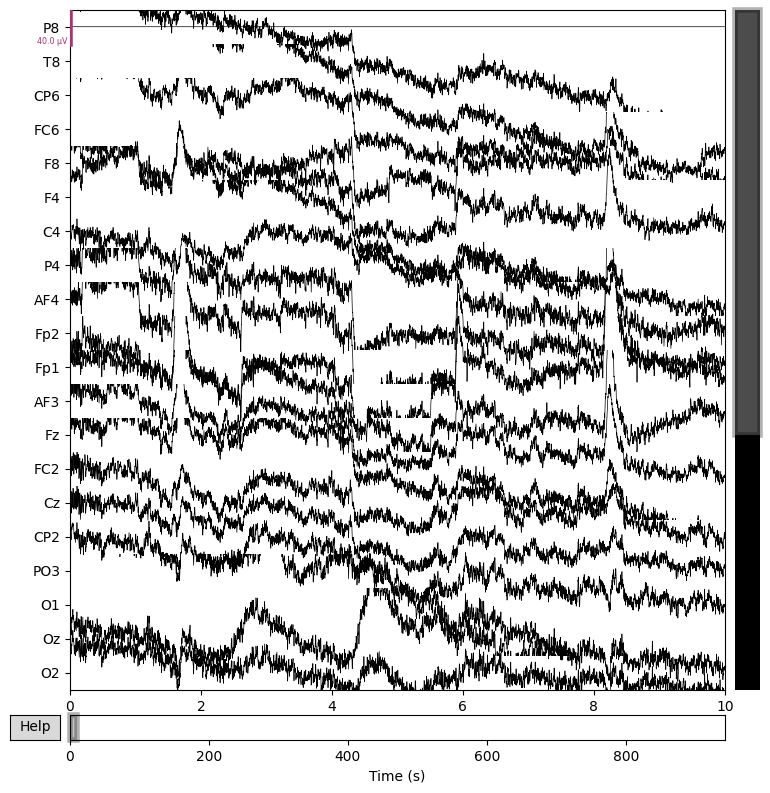

In [2]:
raw.plot();

In [3]:

# 3. Filtering
raw_notch = raw.copy().notch_filter(freqs=50)
raw_erp = raw_notch.copy().filter(0.5, 30)
raw_psd = raw_notch.copy().filter(1, 45)

# 4. Downsampling (optional)
raw_erp.resample(250)
raw_psd.resample(250)

# 5. Rereferencing
raw_erp.set_eeg_reference('average', projection=False)
raw_psd.set_eeg_reference('average', projection=False)

# 6. Artifact Correction with ICA
ica = mne.preprocessing.ICA(n_components=30, random_state=42, method='fastica')
ica.fit(raw_erp)
# Automatically find EOG components (assuming channels labeled 'Fp1','Fp2')
eog_inds, scores = ica.find_bads_eog(raw_erp, ch_name=['Fp1', 'Fp2'])
ica.exclude = eog_inds
raw_erp_clean = ica.apply(raw_erp.copy())
raw_psd_clean = ica.apply(raw_erp.copy())

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished


Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 9.5s.
Using EOG channels: Fp1, Fp2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 32 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 32 PCA components


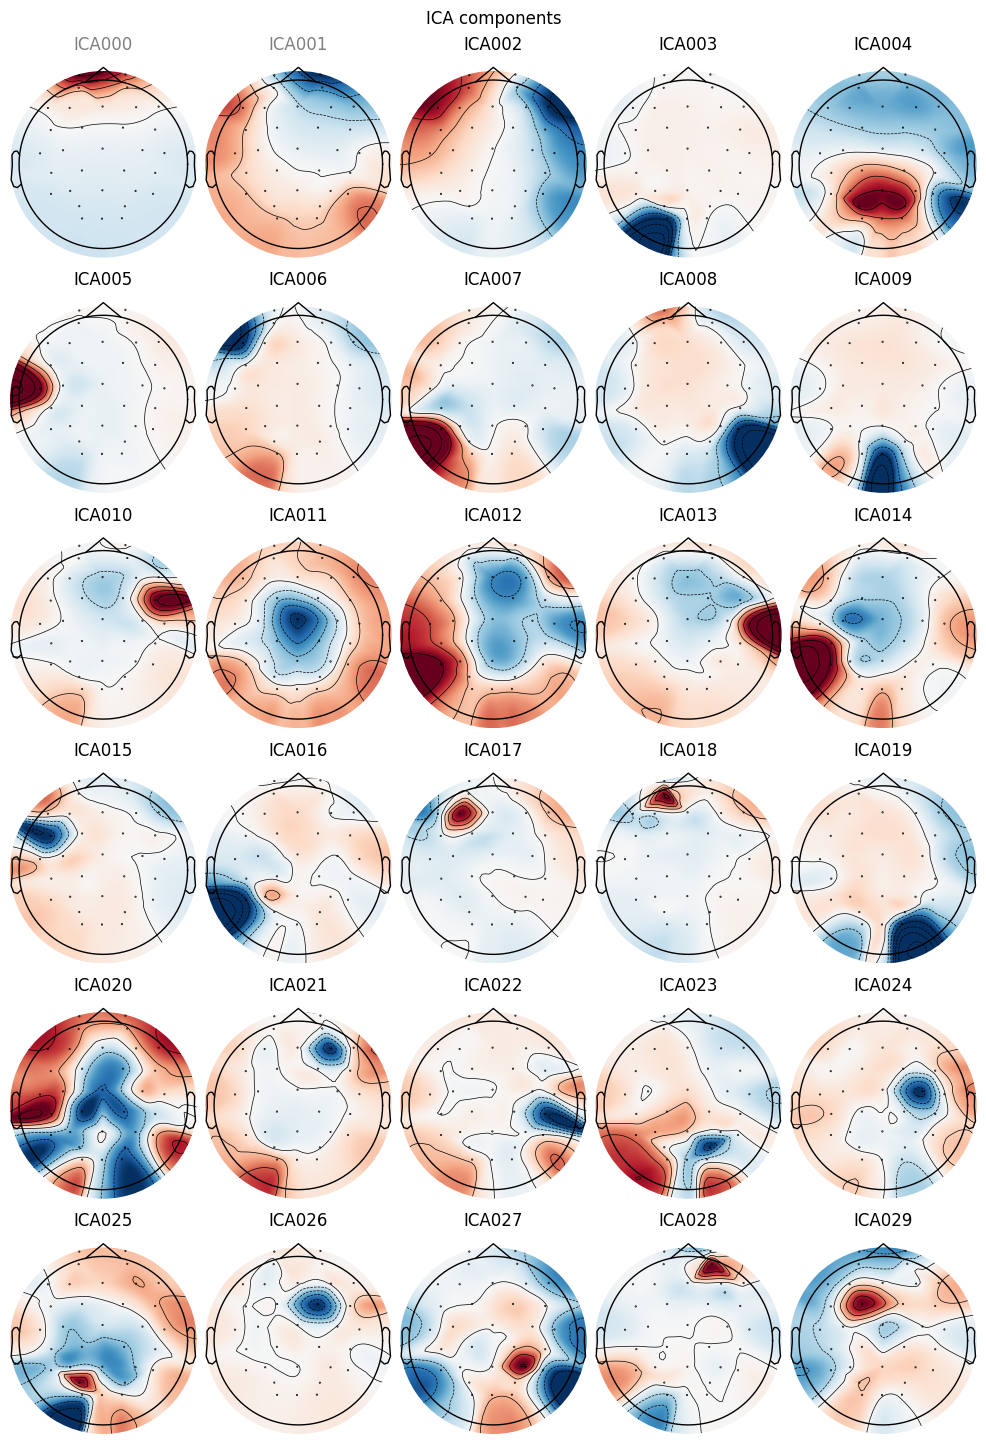

Creating RawArray with float64 data, n_channels=30, n_times=235712
    Range : 0 ... 235711 =      0.000 ...   942.844 secs
Ready.


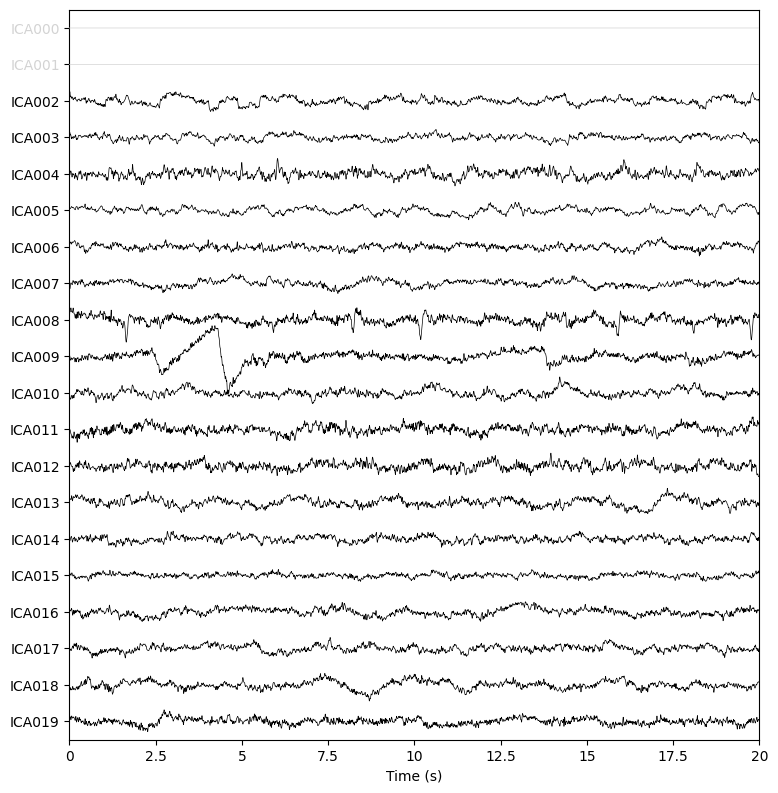

In [4]:
ica.plot_components(picks=range(ica.n_components_))
ica.plot_sources(raw_erp_clean, show_scrollbars=False);

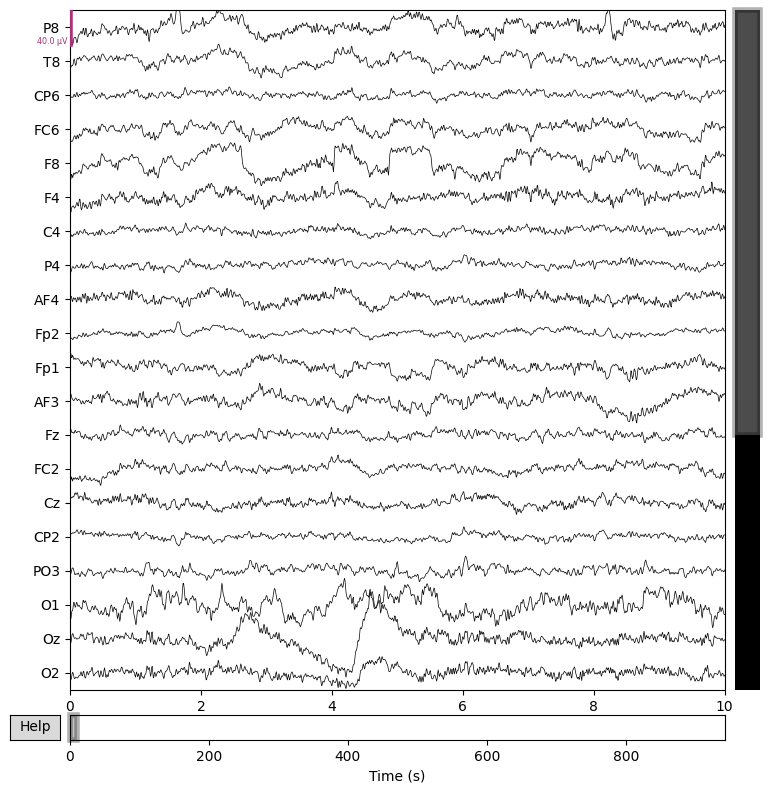

In [5]:
raw_erp_clean.plot();

# P300

Not setting metadata
74 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 74 events and 501 original time points ...
41 bad epochs dropped
Surviving epochs: 33


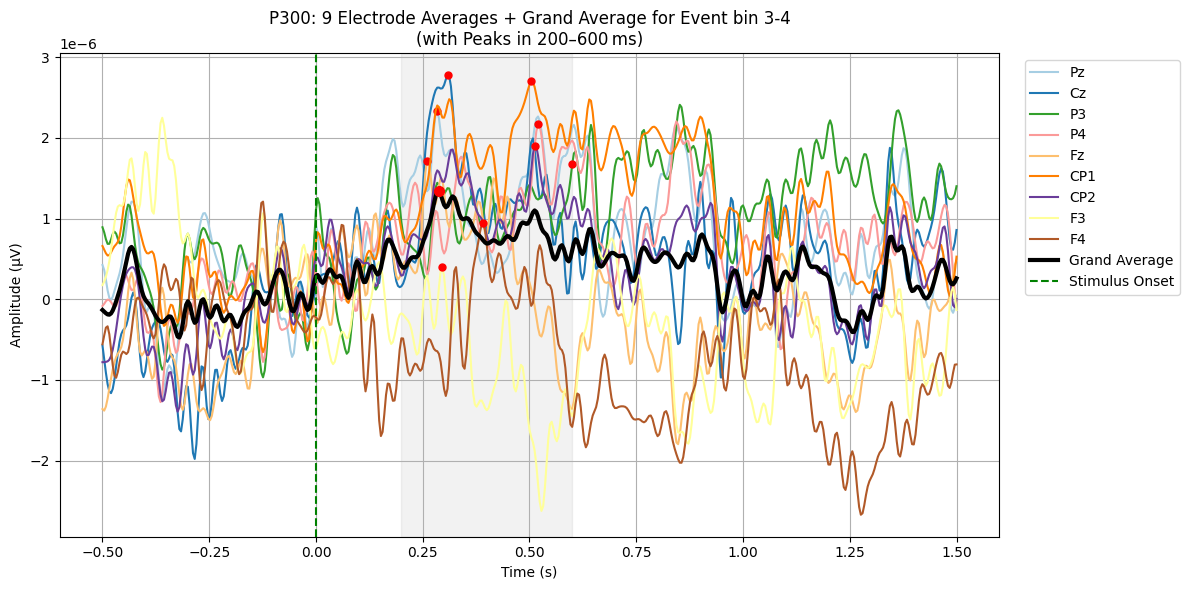

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
P300 Peak: 0.00 μV at 288.0 ms


In [32]:
#3 - 4 for all electrodes

p300_epochs = mne.Epochs(
    raw_erp_clean,
    events,
    event_id=[3, 4],
    tmin=-0.5,
    tmax=1.5,
    baseline=(-0.2, 0),
    preload=True,
    picks=['Pz','Cz','P3','P4','Fz','CP1','CP2','F3','F4']
)
p300_epochs.drop_bad()
print("Surviving epochs:", len(p300_epochs))






import matplotlib.pyplot as plt
import numpy as np

# Your 9 channels
parietal_chans = ['Pz','Cz','P3','P4','Fz','CP1','CP2','F3','F4']
epochs9 = p300_epochs.copy().pick(parietal_chans)

# Get data (n_epochs, n_channels, n_times) and times
data = epochs9.get_data()
times = epochs9.times

# 1) Compute per-channel average
avg_per_chan = np.mean(data, axis=0)  # shape: (9, n_times)

# 2) Compute grand average across those 9 channels
grand_avg = np.mean(avg_per_chan, axis=0)  # shape: (n_times,)

# Color map for the 9 channels
# colors = plt.cm.viridis(np.linspace(0, 1, len(parietal_chans)))
# colors = plt.cm.Set1(np.linspace(0, 1, len(parietal_chans)))
# colors = plt.cm.tab10(np.linspace(0, 1, len(parietal_chans)))
# colors = plt.cm.tab20(np.linspace(0, 1, len(parietal_chans)))
colors = plt.cm.Paired(np.linspace(0, 1, len(parietal_chans)))

plt.figure(figsize=(12, 6))

# Plot each channel
for i, ch in enumerate(parietal_chans):
    wv = avg_per_chan[i]
    # find peak in P300 window
    mask = (times >= 0.2) & (times <= 0.6)
    win_t = times[mask]
    win_d = wv[mask]
    pk_idx = np.argmax(win_d)
    pk_t = win_t[pk_idx]
    pk_a = win_d[pk_idx]

    plt.plot(times, wv, color=colors[i], linewidth=1.5, label=ch)
    plt.plot(pk_t, pk_a, 'o', color='red', markersize=5)

# Plot grand average
# find its peak
mask = (times >= 0.2) & (times <= 0.6)
win_t = times[mask]
win_d = grand_avg[mask]
g_idx = np.argmax(win_d)
g_t = win_t[g_idx]
g_a = win_d[g_idx]

plt.plot(times, grand_avg,
         color='black', linewidth=3, label='Grand Average')
plt.plot(g_t, g_a, 'o', color='red', markersize=7)

# Stimulus and window shading
plt.axvline(0, color='green', linestyle='--', linewidth=1.5, label='Stimulus Onset')
plt.axvspan(0.2, 0.6, color='gray', alpha=0.1)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.title('P300: 9 Electrode Averages + Grand Average for Event bin 3-4\n(with Peaks in 200–600 ms)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()





# 1. Create evoked response by averaging epochs
evoked_p300 = p300_epochs.average()

# 2. Select parietal channels (P300 maximum)
parietal_channels = ['Pz','Cz','P3','P4','Fz','CP1','CP2','F3','F4']
evoked_parietal = evoked_p300.pick_channels(parietal_channels)

# 3. Define P300 time window (250-500ms)
tmin, tmax = 0.2, 0.6  # seconds
evoked_window = evoked_parietal.copy().crop(tmin, tmax)

# 4. Find peak in the averaged signal
data = evoked_window.data.mean(axis=0)  # average across channels
times = evoked_window.times
peak_idx = np.argmax(data)  # P300 is positive component
peak_amplitude = data[peak_idx]
peak_latency = times[peak_idx] * 1000  # convert to ms

print(f"P300 Peak: {peak_amplitude:.2f} μV at {peak_latency:.1f} ms")





# N200

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# N200 epochs bin 1 7 electrodes
n200_epochs = mne.Epochs(
    raw_erp_clean,
    events,
    event_id=[4, 5, 6, 7],
    tmin=-0.2,
    tmax=0.8,
    baseline=(-0.2, 0),
    preload=True,
    picks=['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']
)
n200_epochs.drop_bad()
print("Surviving epochs:", len(n200_epochs))



Not setting metadata
50 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 50 events and 251 original time points ...
26 bad epochs dropped
Surviving epochs: 24


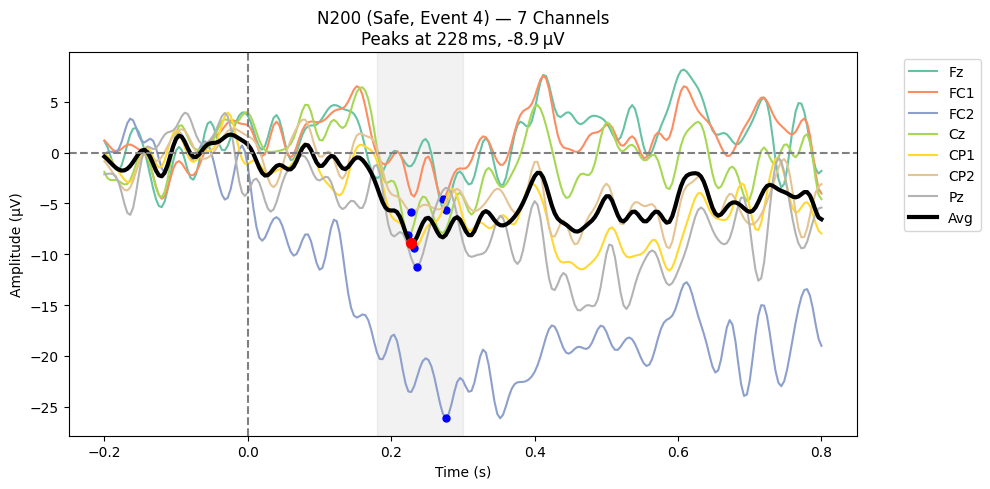

=== Safe (Event 4) N200 peaks ===
   Fz:  276.0 ms,  -5.6 µV
  FC1:  272.0 ms,  -4.5 µV
  FC2:  276.0 ms, -26.1 µV
   Cz:  224.0 ms,  -8.1 µV
  CP1:  232.0 ms,  -9.4 µV
  CP2:  228.0 ms,  -5.8 µV
   Pz:  236.0 ms, -11.2 µV
AVG:  228.0 ms,  -8.9 µV



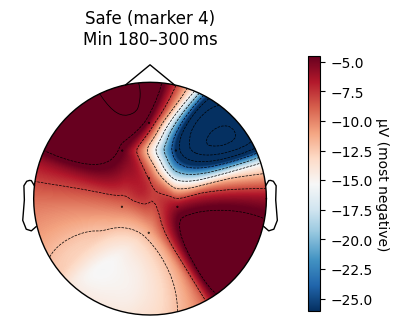

In [24]:


import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    4: 'Safe',
    5: 'Risky Win',
    6: 'Risky Loss',
    7: 'Reveal'
}
chs7 = ['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']

# --- 2. Pick your marker manually here ---
selected_event = 4  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 7 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



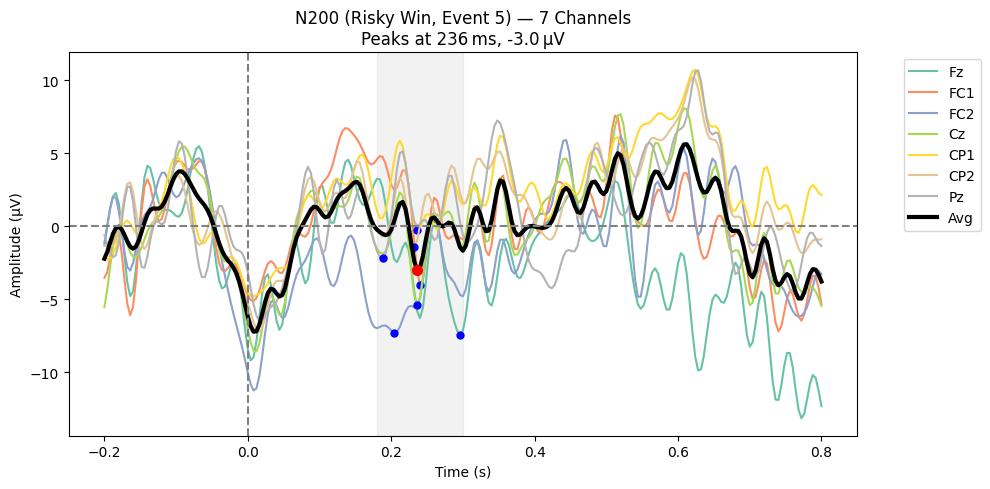

=== Risky Win (Event 5) N200 peaks ===
   Fz:  296.0 ms,  -7.4 µV
  FC1:  240.0 ms,  -4.0 µV
  FC2:  204.0 ms,  -7.3 µV
   Cz:  236.0 ms,  -5.4 µV
  CP1:  236.0 ms,  -0.3 µV
  CP2:  232.0 ms,  -1.4 µV
   Pz:  188.0 ms,  -2.2 µV
AVG:  236.0 ms,  -3.0 µV



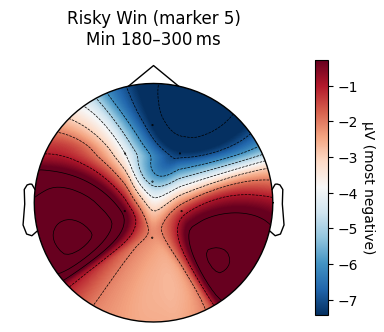

In [25]:
chs7 = ['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 7 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



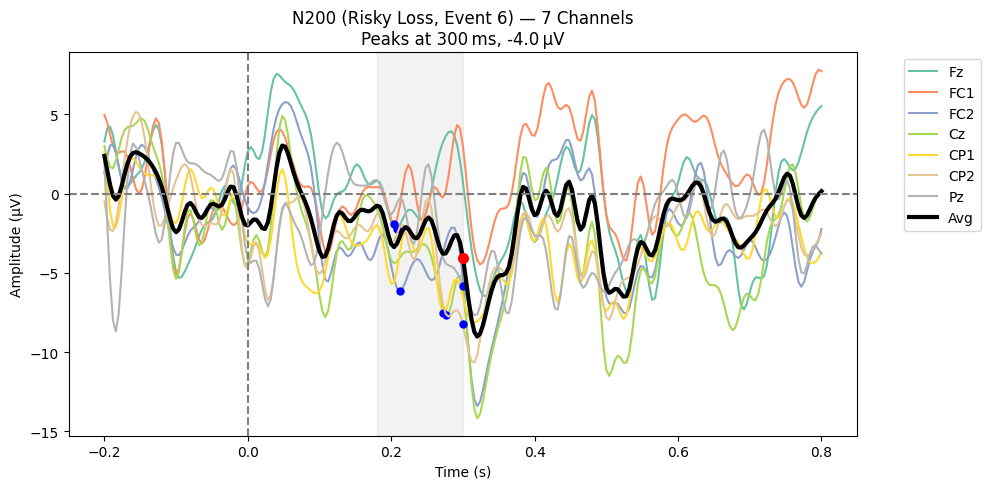

=== Risky Loss (Event 6) N200 peaks ===
   Fz:  208.0 ms,  -2.2 µV
  FC1:  204.0 ms,  -1.9 µV
  FC2:  212.0 ms,  -6.1 µV
   Cz:  276.0 ms,  -7.7 µV
  CP1:  272.0 ms,  -7.6 µV
  CP2:  300.0 ms,  -8.3 µV
   Pz:  300.0 ms,  -5.8 µV
AVG:  300.0 ms,  -4.0 µV



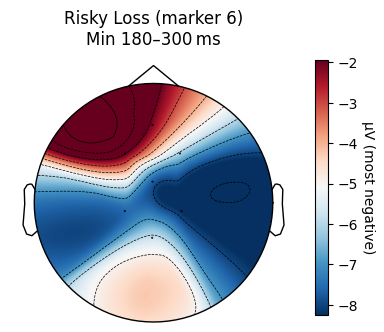

In [26]:
chs7 = ['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 7 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



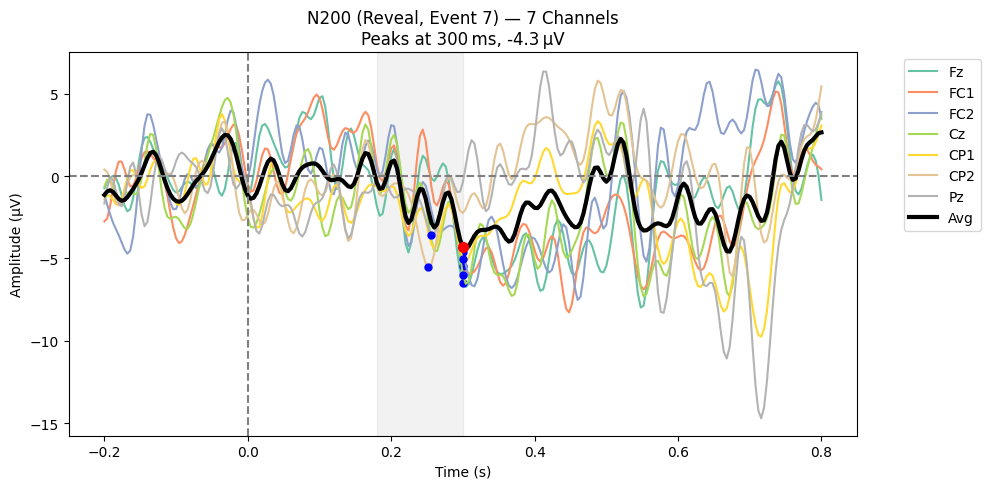

=== Reveal (Event 7) N200 peaks ===
   Fz:  300.0 ms,  -6.5 µV
  FC1:  300.0 ms,  -5.5 µV
  FC2:  300.0 ms,  -4.6 µV
   Cz:  300.0 ms,  -6.0 µV
  CP1:  300.0 ms,  -5.0 µV
  CP2:  252.0 ms,  -5.5 µV
   Pz:  256.0 ms,  -3.6 µV
AVG:  300.0 ms,  -4.3 µV



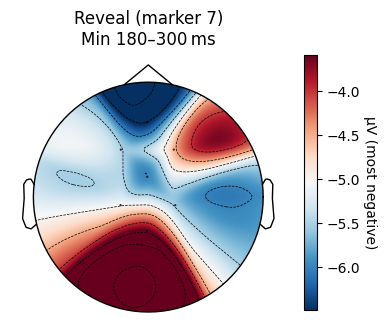

In [27]:
chs7 = ['Fz', 'FC1', 'FC2', 'Cz', 'CP1', 'CP2', 'Pz']

# --- 2. Pick your marker manually here ---
selected_event = 7  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 7 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



# for 3 elctrodes

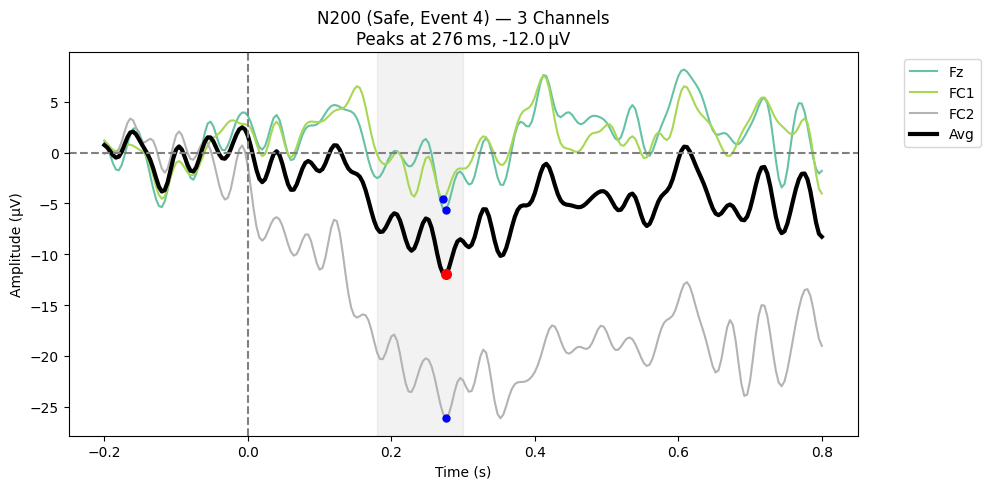

=== Safe (Event 4) N200 peaks ===
   Fz:  276.0 ms,  -5.6 µV
  FC1:  272.0 ms,  -4.5 µV
  FC2:  276.0 ms, -26.1 µV
AVG:  276.0 ms, -12.0 µV



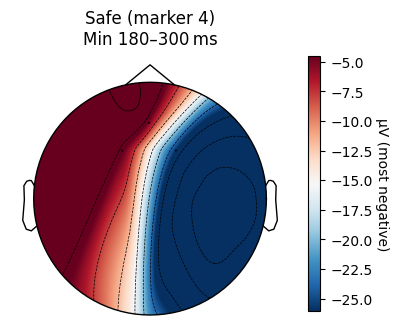

In [28]:
chs7 = ['Fz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 4  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 3 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



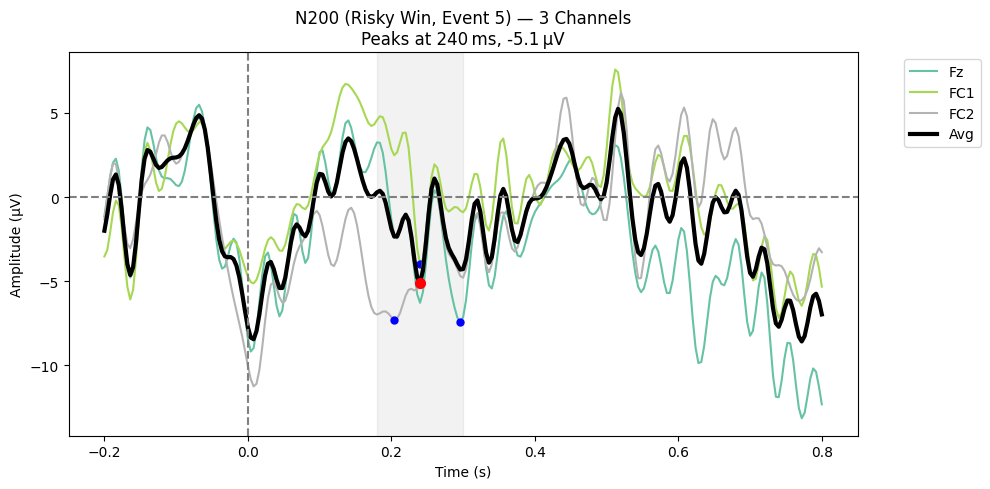

=== Risky Win (Event 5) N200 peaks ===
   Fz:  296.0 ms,  -7.4 µV
  FC1:  240.0 ms,  -4.0 µV
  FC2:  204.0 ms,  -7.3 µV
AVG:  240.0 ms,  -5.1 µV



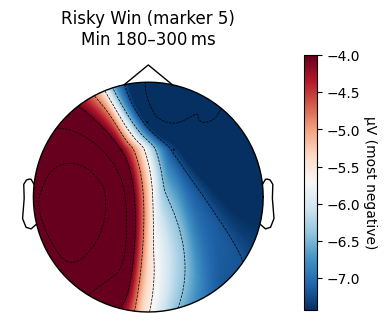

In [29]:
chs7 = ['Fz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 3 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



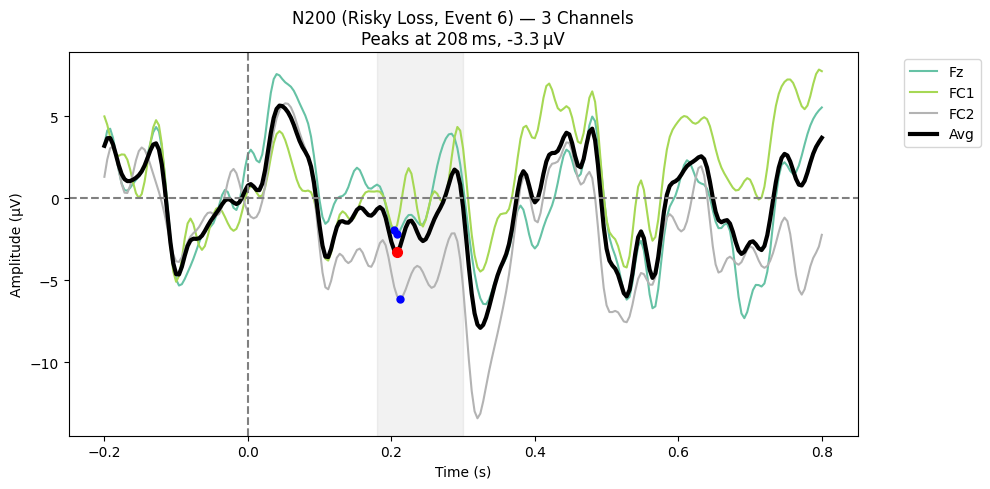

=== Risky Loss (Event 6) N200 peaks ===
   Fz:  208.0 ms,  -2.2 µV
  FC1:  204.0 ms,  -1.9 µV
  FC2:  212.0 ms,  -6.1 µV
AVG:  208.0 ms,  -3.3 µV



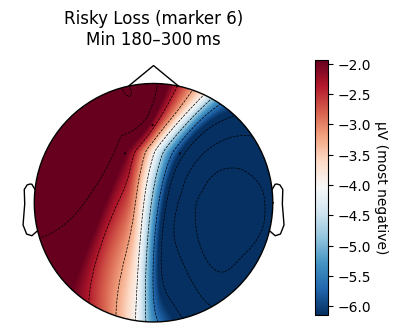

In [30]:
chs7 = ['Fz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 3 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



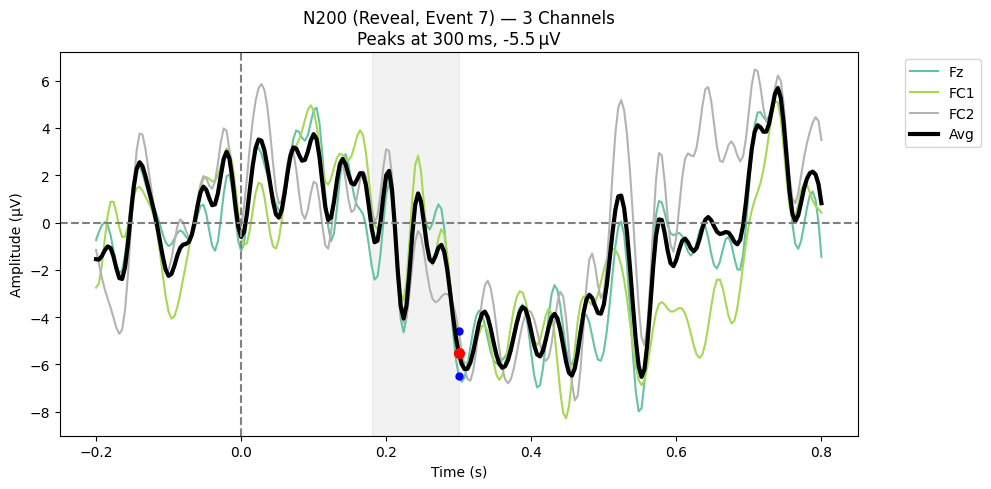

=== Reveal (Event 7) N200 peaks ===
   Fz:  300.0 ms,  -6.5 µV
  FC1:  300.0 ms,  -5.5 µV
  FC2:  300.0 ms,  -4.6 µV
AVG:  300.0 ms,  -5.5 µV



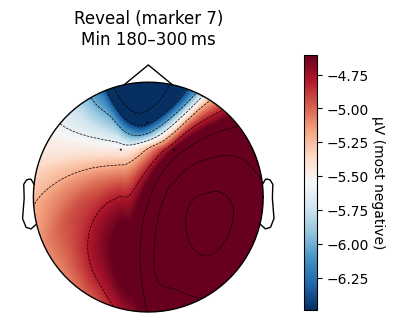

In [31]:
chs7 = ['Fz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 7  # ← change this to 4, 5, or 6, 7
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.18, 0.3

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs7)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = n200_epochs[selected_event].copy().pick(chs7)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs7):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'N200 ({name}, Event {selected_event}) — 3 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) N200 peaks ===")
for ch in chs7:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"AVG: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.18, 0.3

ev  = n200_epochs[selected_event].copy().pick(chs7).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (marker {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



# FRN

In [7]:
# FRN epochs 
frn_epochs = mne.Epochs(
    raw_erp_clean,
    events,
    event_id=[4, 5, 6],
    tmin=-0.2,
    tmax=0.6,
    baseline=(-0.2, 0),
    preload=True,
    picks=['Fz', 'Cz', 'FC1', 'FC2']
   
)
frn_epochs.drop_bad()
print("Surviving epochs:", len(frn_epochs))


Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 201 original time points ...
25 bad epochs dropped
Surviving epochs: 23


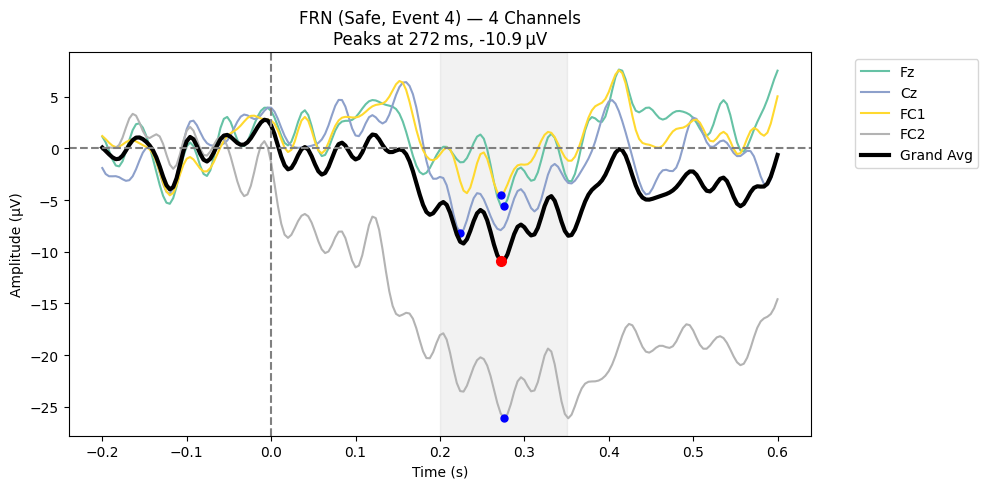

=== Safe (Event 4) FRN peaks ===
   Fz:  276.0 ms,  -5.6 µV
   Cz:  224.0 ms,  -8.1 µV
  FC1:  272.0 ms,  -4.5 µV
  FC2:  276.0 ms, -26.1 µV
Grand:  272.0 ms, -10.9 µV



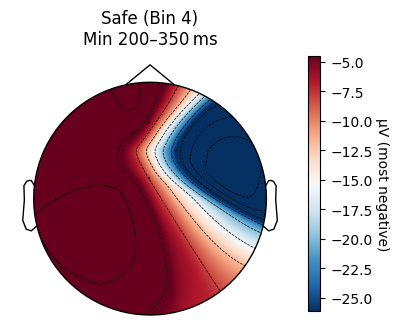

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# --- 1. Define your event bins and channel sets ---
event_bins = {
    4: 'Safe',
    5: 'Risky Win',
    6: 'Risky Loss'
}

chs4 = ['Fz', 'Cz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 4  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs4)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs4)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs4):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) — 4 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs4:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")


tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs4).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()



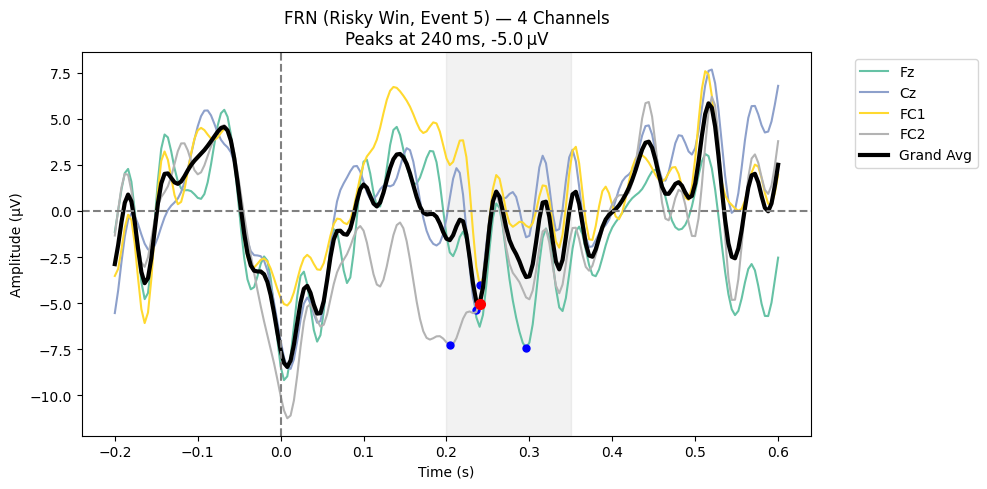

=== Risky Win (Event 5) FRN peaks ===
   Fz:  296.0 ms,  -7.4 µV
   Cz:  236.0 ms,  -5.4 µV
  FC1:  240.0 ms,  -4.0 µV
  FC2:  204.0 ms,  -7.3 µV
Grand:  240.0 ms,  -5.0 µV



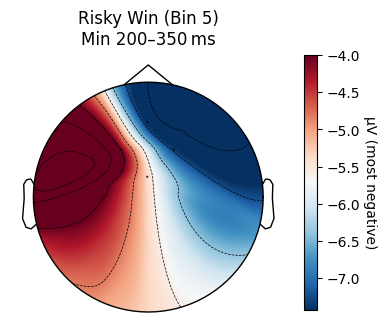

In [ ]:
chs4 = ['Fz', 'Cz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs4)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs4)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs4):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) — 4 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs4:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs4).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


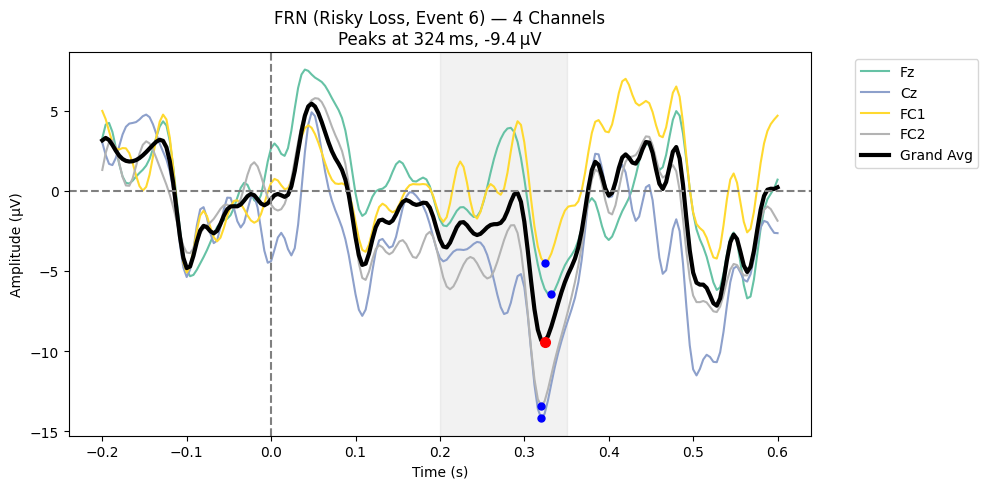

=== Risky Loss (Event 6) FRN peaks ===
   Fz:  332.0 ms,  -6.5 µV
   Cz:  320.0 ms, -14.2 µV
  FC1:  324.0 ms,  -4.5 µV
  FC2:  320.0 ms, -13.4 µV
Grand:  324.0 ms,  -9.4 µV



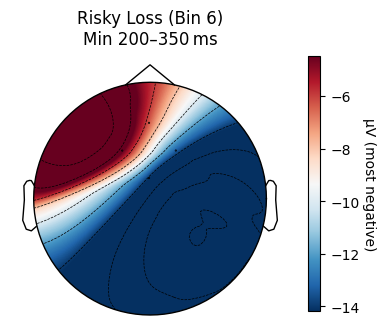

In [ ]:
chs4 = ['Fz', 'Cz', 'FC1', 'FC2']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs4)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs4)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs4):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) — 4 Channels\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs4:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs4).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


## frn 2 electrodes

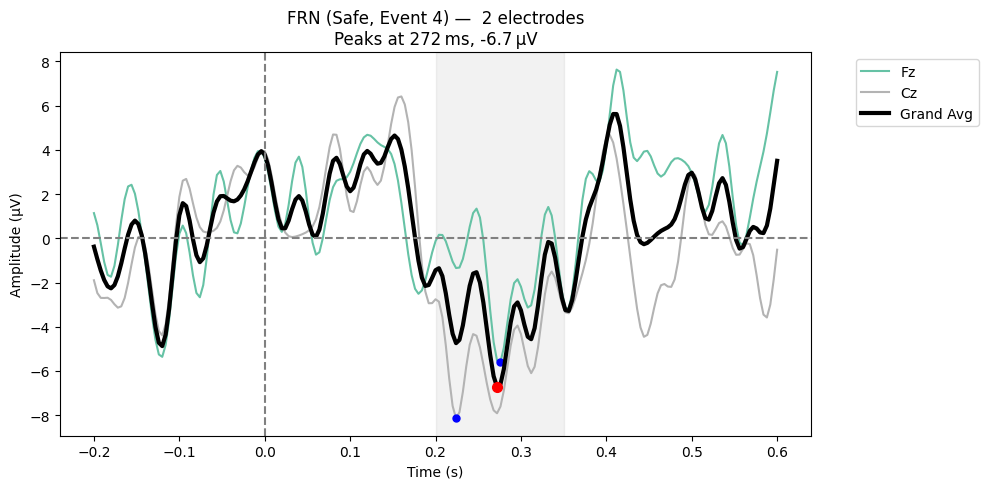

=== Safe (Event 4) FRN peaks ===
   Fz:  276.0 ms,  -5.6 µV
   Cz:  224.0 ms,  -8.1 µV
Grand:  272.0 ms,  -6.7 µV



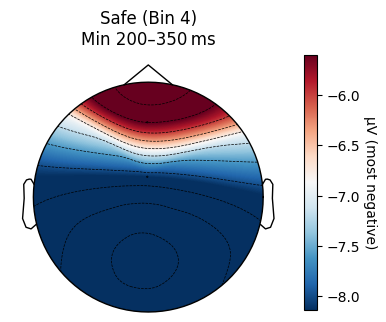

In [20]:
chs2 = ['Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 4  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs2)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs2)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs2):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) —  2 electrodes\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs2:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs2).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


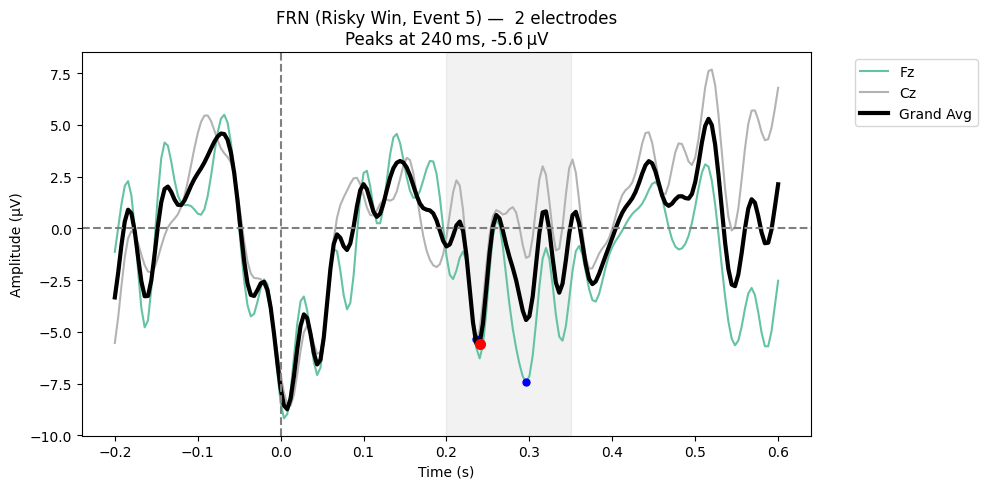

=== Risky Win (Event 5) FRN peaks ===
   Fz:  296.0 ms,  -7.4 µV
   Cz:  236.0 ms,  -5.4 µV
Grand:  240.0 ms,  -5.6 µV



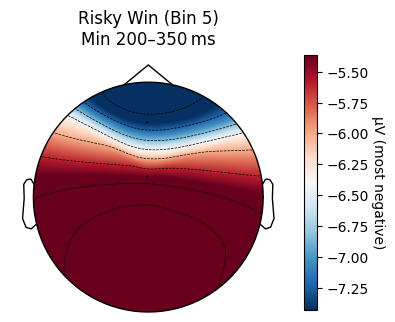

In [19]:
chs2 = ['Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 5  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs2)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs2)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs2):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) —  2 electrodes\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs2:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs2).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()


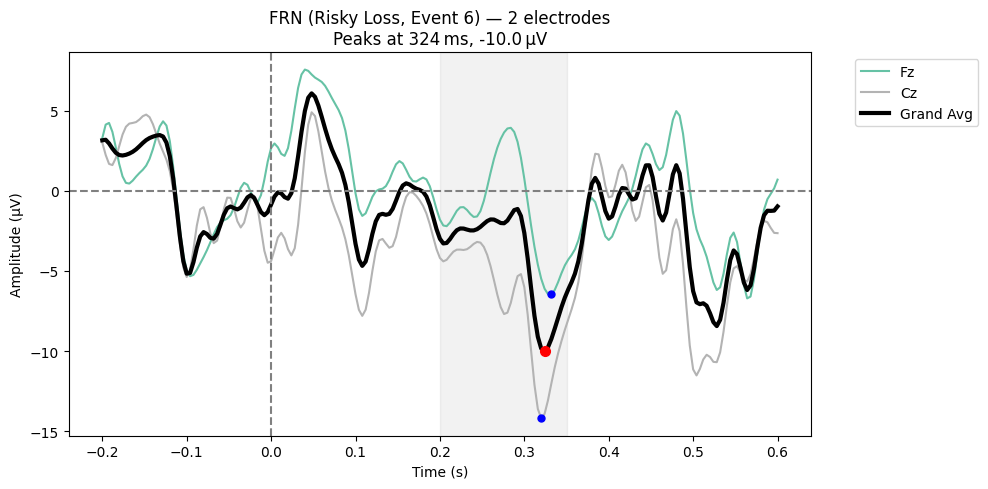

=== Risky Loss (Event 6) FRN peaks ===
   Fz:  332.0 ms,  -6.5 µV
   Cz:  320.0 ms, -14.2 µV
Grand:  324.0 ms, -10.0 µV



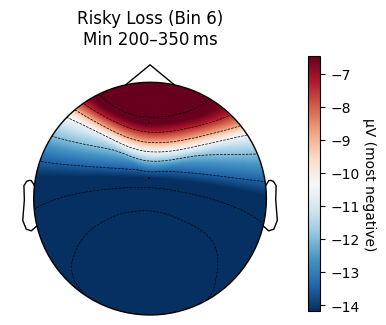

In [18]:
chs2 = ['Fz', 'Cz']

# --- 2. Pick your marker manually here ---
selected_event = 6  # ← change this to 4, 5, or 6
name = event_bins[selected_event]

# --- 3. FRN time window (in seconds) ---
tmin, tmax = 0.2, 0.35

# --- 4. Prepare a color map ---
colors = plt.cm.Set2(np.linspace(0, 1, len(chs2)))

# --- 5. Select just that one event’s epochs and compute Evoked ---
epochs_sel = frn_epochs[selected_event].copy().pick(chs2)
evoked     = epochs_sel.average()
times      = evoked.times
data       = evoked.data * 1e6  # µV

# --- 6. Find per‑channel peaks in your window ---
mask     = (times >= tmin) & (times <= tmax)
win_times = times[mask]

pk_times = {}
pk_amps  = {}
plt.figure(figsize=(10, 5))

for idx, ch in enumerate(chs2):
    wv     = data[idx]
    win_wv = wv[mask]
    pk_idx = np.argmin(win_wv)
    pk_t   = win_times[pk_idx]
    pk_a   = win_wv[pk_idx]
    pk_times[ch] = pk_t
    pk_amps[ch]  = pk_a

    plt.plot(times, wv, label=ch, color=colors[idx], lw=1.5)
    plt.plot(pk_t, pk_a, 'o', color='blue', ms=5)

# --- 7. Grand average peak ---
grand     = data.mean(axis=0)
grand_win = grand[mask]
g_idx     = np.argmin(grand_win)
g_t       = win_times[g_idx]
g_a       = grand_win[g_idx]

plt.plot(times, grand, color='k', lw=3, label='Grand Avg')
plt.plot(g_t, g_a, 'o', color='red', ms=7)

# --- 8. Beautify the plot ---
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')
plt.axvspan(tmin, tmax, color='gray', alpha=0.1)
plt.title(f'FRN ({name}, Event {selected_event}) — 2 electrodes\n'
          f'Peaks at {int(g_t*1e3)} ms, {g_a:.1f} µV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 9. Print out the peaks ---
print(f"=== {name} (Event {selected_event}) FRN peaks ===")
for ch in chs2:
    print(f"  {ch:>3}: {pk_times[ch]*1e3:6.1f} ms, {pk_amps[ch]:5.1f} µV")
print(f"Grand: {g_t*1e3:6.1f} ms, {g_a:5.1f} µV\n")

tmin_avg, tmax_avg = 0.2, 0.35

ev  = frn_epochs[selected_event].copy().pick(chs2).average()
ev_crop = ev.copy().crop(tmin_avg, tmax_avg)
data_win = ev_crop.data            # shape (4, n_times)
data_min = data_win.min(axis=1)    # one µV value per channel

# convert volts → microvolts
data_min_uv = data_min * 1e6

# update color‐limits too (now in µV)
vmin_uv = data_min_uv.min()
vmax_uv = data_min_uv.max()

fig, ax = plt.subplots(figsize=(4, 4))
im, cn = mne.viz.plot_topomap(
    data_min_uv,
    ev.info,
    axes=ax,
    contours=10,
    vlim=(vmin_uv, vmax_uv),
    cmap='RdBu_r',
    sensors=True,
    sphere=0.10,
    show=False
)
ax.set_title(f"{name} (Bin {selected_event})\n"
             f"Min {int(tmin_avg*1e3)}–{int(tmax_avg*1e3)} ms")
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('µV (most negative)', rotation=270, labelpad=12)
plt.tight_layout()
plt.show()
